# 4. K-means can go wrong!

<div style="text-align: justify">
The practical impossibility, in applications of concrete interest, of enumerating the full set of partitions of $n$ elements in $g$ distinct groups, makes the 'optimal' classification one reaches through K-means potentially corresponding to a local minimum of the objective function:
<br>
<br>
<div style="text-align: center">
$ {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset{\mathbf{S}}{arg\,min}\sum_{i=1}^{k}|S_{i}|{Var}S_{i}}$ 
</div>
<br>
(based on the computation of deviance "within" among the clusters). In such situations, the obtained solution can depend on the starting configuration, picked in the first step of the iterative procedure. To correctly interpret the results, it is of great importance to accurately evaluate the criteria by means of which one got to the initial partition.
<br>
Once the number of clusters has been determined, one must detect the poles which will constitute the centroids in the opening partition.
<br>
A very simple and inexpensive criterion consists in taking as starting seeds the first $g$ observations of the dataset. A slightly more formalized method leads, instead, to obtaining the poles via drawing a random sample of $g$ units from the $n$ that compose the dataset.
<br>
Both the aforementioned rules, nevertheless, do not seem to be very satisfying, since they cannot guarantee the the initial seeds are effectively representative of the whole cloud of points in the $p$-dimensional space.
<br>
Such requirement, indeed, has a preminent relevance in real applications, since it allows us to improve the convergence speed of non-hierarchical algorithms. It enhances the capability of those methods to provide, in quick times, a final classification very near to the optimal solution (in terms of intra-clusters homogeneity) and to identify the group structures really present in the data.
<br>
Poles representatitvity is usually pursued by locating sufficiently spaced observations in $R^p$. For instance, one could pinpoint $g$ elements which reciprocal distance is not lesser than a fixed threshold. 
<br>
The aim of such expedients is to generate finely spaced centroids in the initial partition, so that each point gets sufficiently near to one of them.
</div>
On the basis of this short introduction, we want to execute two different verions of the K-means algorithm and compare the results, in order to verify if there is a concrete enhancement in selecting a proper initialization method.
<br>
In particular, we will resort to Random Initialization and K-means++ options.

As usual, let us import our custom library.

In [1]:
import theoretical_lib as tl

<div style="text-align: justify">
The dataframe we chose to run our experiment can be found here https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+(North+Jutland,+Denmark). It contain geospatial data and was constructed by adding elevation information to a 2D road network in North Jutland, Denmark.
</div>

In [2]:
dataframe = tl.get_dataframe()

In [3]:
dataframe.head()

,Osm ID,Longitude,Latitude,Altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


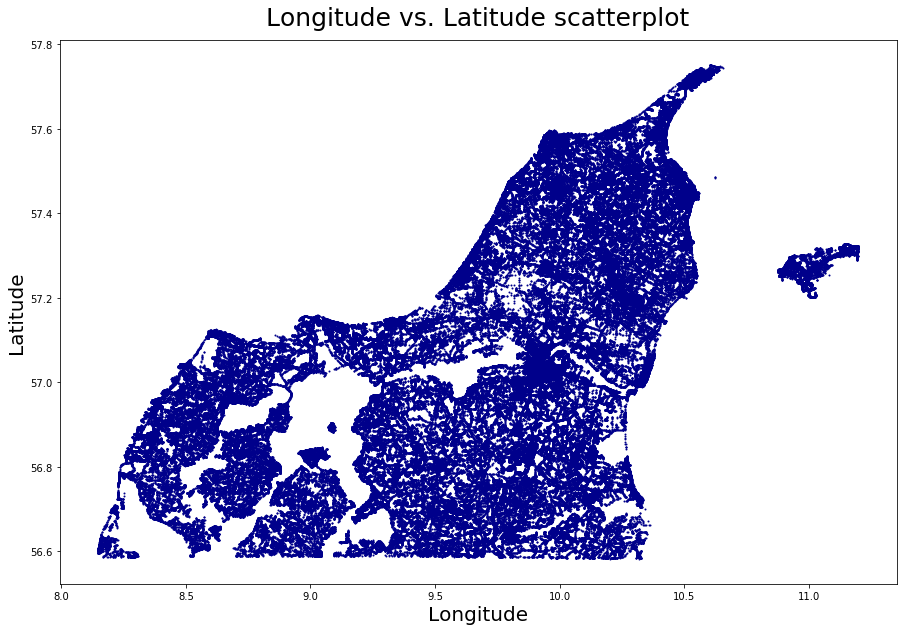

In [4]:
tl.scatterplot(dataframe)

To improve the clustering results, we decided to scale data.

In [5]:
dataframe_scaled_reduced = tl.get_scaled_reduced_dataframe(dataframe)

In [6]:
dataframe_scaled_reduced.head()

,Longitude,Latitude
0,0.394249,0.135605
1,0.394361,0.135436
2,0.394479,0.135321
3,0.394563,0.135270
4,0.394644,0.135272


In [7]:
clusters, distinct_clusters, centroids, dataframe_scaled_reduced_updated = tl.k_means_random_init(dataframe_scaled_reduced)

In [8]:
dataframe_scaled_reduced_updated.head()

,Longitude,Latitude,Clusters
0,0.394249,0.135605,7
1,0.394361,0.135436,7
2,0.394479,0.135321,7
3,0.394563,0.135270,7
4,0.394644,0.135272,7


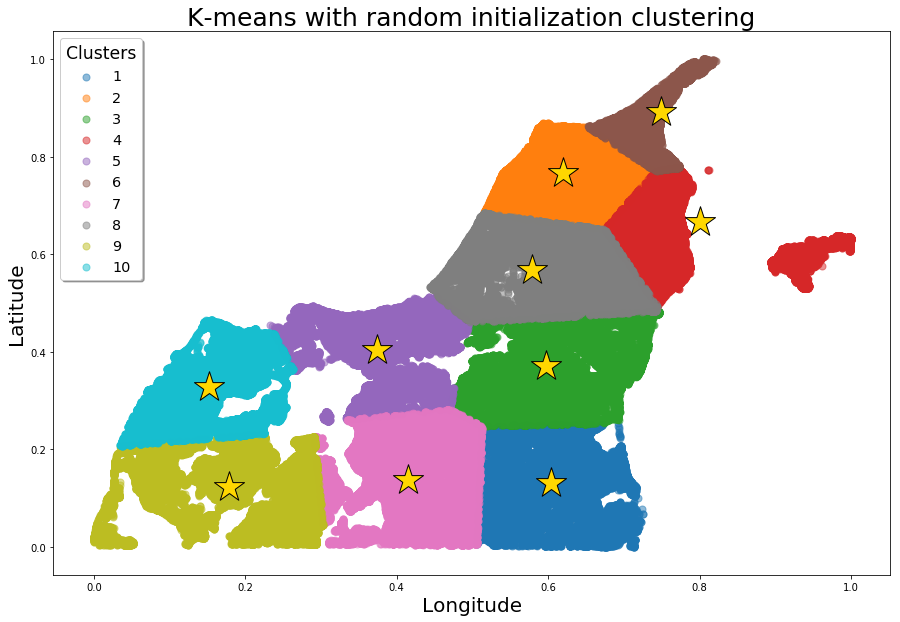

In [9]:
tl.random_init_scatterplot(dataframe_scaled_reduced_updated, distinct_clusters, centroids)

In [18]:
times_random_init, inertias_random_init, iterations_random_init = tl.simulation_random_init(dataframe_scaled_reduced)

In [11]:
clusters_, distinct_clusters_, centroids_, dataframe_scaled_reduced_updated_ = tl.k_means_plus_plus(dataframe_scaled_reduced)

In [12]:
dataframe_scaled_reduced_updated_.head()

,Longitude,Latitude,Clusters
0,0.394249,0.135605,8
1,0.394361,0.135436,8
2,0.394479,0.135321,8
3,0.394563,0.135270,8
4,0.394644,0.135272,8


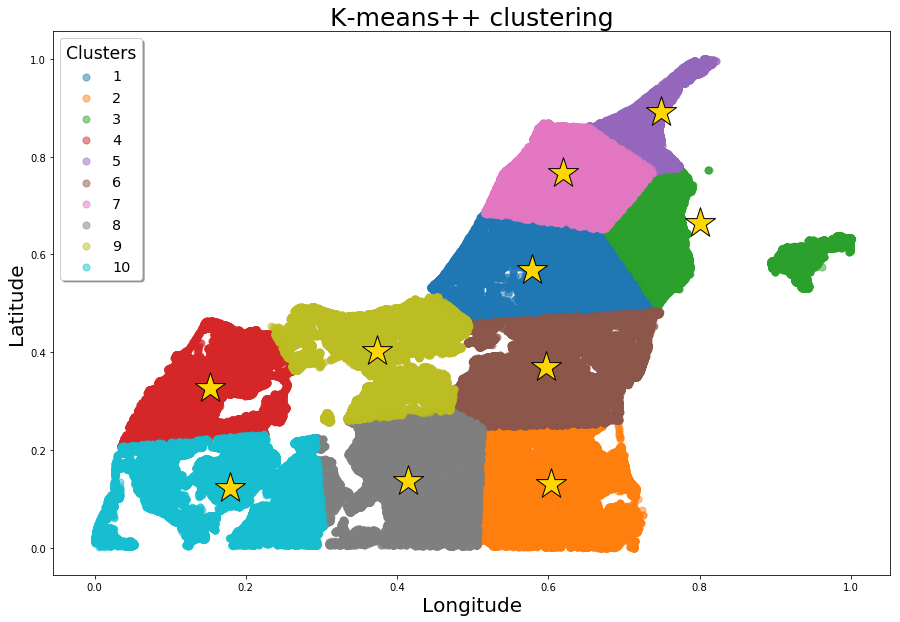

In [13]:
tl.plus_plus_scatterplot(dataframe_scaled_reduced_updated_, distinct_clusters, centroids)

In [19]:
times_plus_plus, inertias_plus_plus, iterations_plus_plus = tl.simulation_plus_plus(dataframe_scaled_reduced)

<div style="text-align: justify">
The first element we were eager to analyze was the execution time of both the versions of the algorithm. As most of people think, the K-means++ should perform better by this point of view, but that is not totally correct. 
<br>
The first step of the algorithm, indeed, takes an extra amount of time if compared to the Random Initialization approach. Why that? Because while in the second case the centroids are randomly chosen, in the first one, on the contrary, just one of the gets picked at random, and the following ones have to be computed through a distance metric which aims to spread them in the space.
<br>
The plot corroborates this statement.
</div>

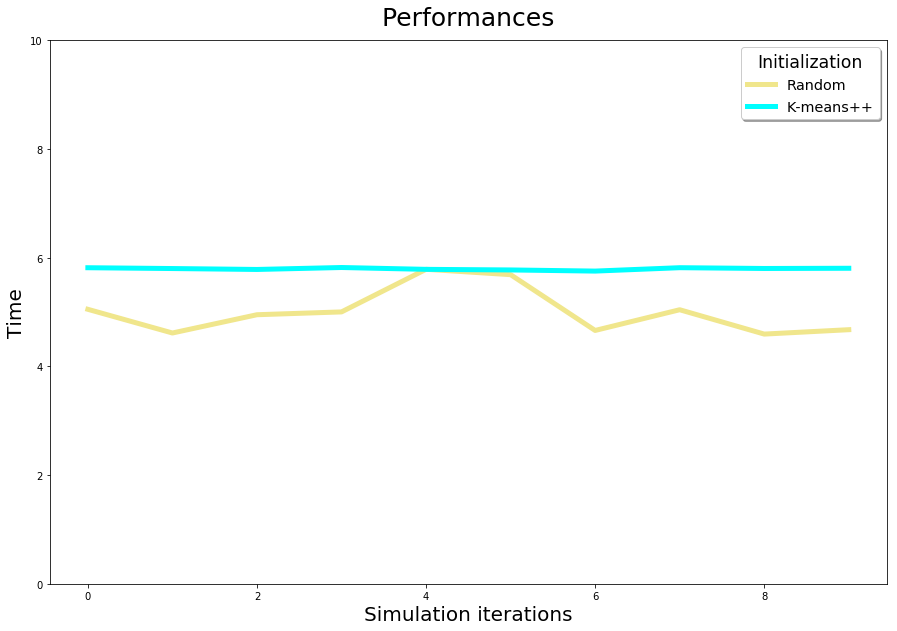

In [20]:
tl.performance_plot(times_random_init, times_plus_plus)

<div style="text-align: justify">
Secondly, we wanted to check how the two methods did in reducing intra-clusters variance. As we can see, there is an absolute better behaviour of K-means++, which shows to yield a constant inertia rate (metric used to analyze deviance "within"), while the variability in the other case is quite heterogeneous.
</div>

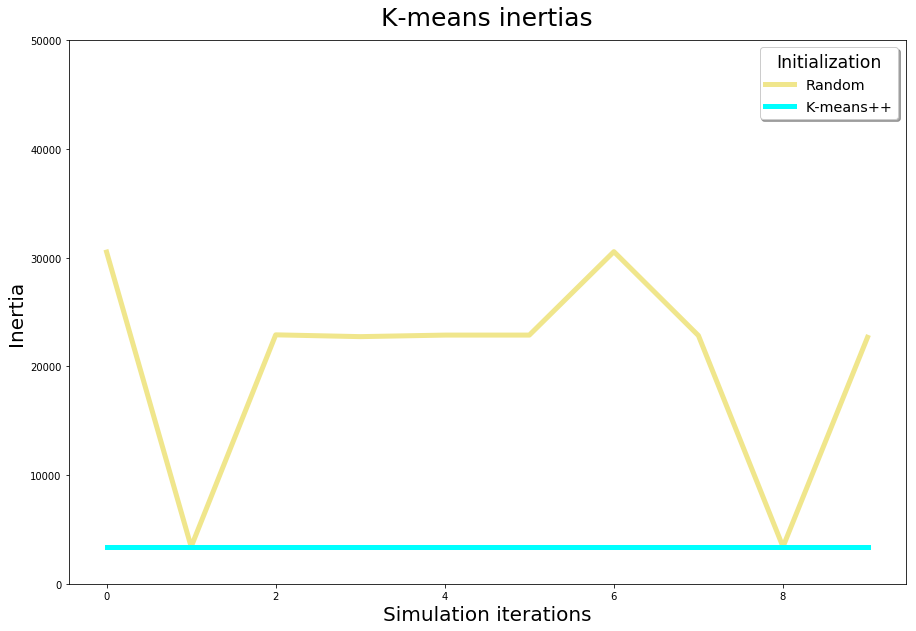

In [21]:
tl.inertias_plot(inertias_random_init, inertias_plus_plus)

<div style="text-align: justify">
And, last but not least, the main issue addressed by K-means++ solution: reducing the number of iterations by properly choosing the initial centroids. 
<br>
The plot speaks by itself: in each simulation the number of iterations taken by the K-means++ method to reach convergence always remain constant, while in the other case it varies from 2 to 6 total iterations.
</div>

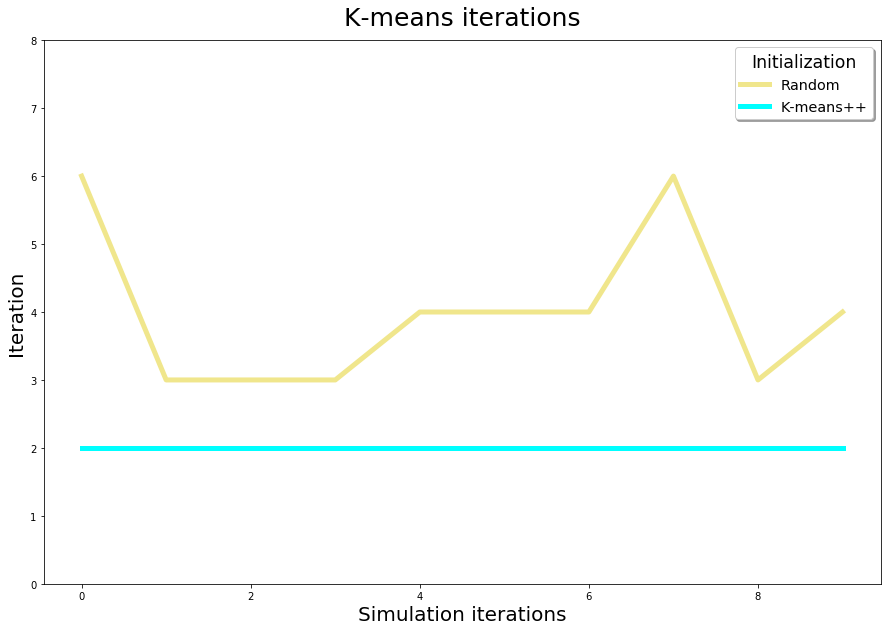

In [22]:
tl.iterations_plot(iterations_random_init, iterations_plus_plus)

<div style="text-align: justify">
In conclusion: running ten times these two version of K-means, we have been able to confirm that, in the case ++ initialization, the results in terms of iterations and inertia are evidently enhanced as compared to the randomic initialization case, leading to maybe slower time of execution but better overall performance in reducing the cost functions above which the K-means algorithm is based on.
</div>    